## Evaluation and Visualization

references:
- [https://github.com/cbsudux/Human-Pose-Estimation-101](https://github.com/cbsudux/Human-Pose-Estimation-101)

code references: 
- [https://github.com/bearpaw/pytorch-pose](https://github.com/bearpaw/pytorch-pose)
- [https://github.com/microsoft/human-pose-estimation.pytorch](https://github.com/microsoft/human-pose-estimation.pytorch)

dataset annotatation references:
- [https://github.com/bearpaw/pytorch-pose](https://github.com/bearpaw/pytorch-pose)
- [https://github.com/HRNet/HRNet-Human-Pose-Estimation](https://github.com/HRNet/HRNet-Human-Pose-Estimation)

pretrained model download (code references에서 가져왔음):
- stacked hourglass : [https://drive.google.com/drive/folders/0B63t5HSgY4SQQ2FBRE5rQ2EzbjQ](https://drive.google.com/drive/folders/0B63t5HSgY4SQQ2FBRE5rQ2EzbjQ)
- simple baseline : [https://drive.google.com/drive/folders/13_wJ6nC7my1KKouMkQMqyr9r1ZnLnukP](https://drive.google.com/drive/folders/13_wJ6nC7my1KKouMkQMqyr9r1ZnLnukP)

**pretrained model은 다음과 같은 경로에 저장해주세요.**

```
stacked hourglass
1. 상단 다운로드 링크 들어가서 checkpoint/mpii/hg_s2_b1/model_best.pth.tar 다운로드
2. model_best.pth.tar -> hg_s2_b1.pth.tar 이름 변경
3. 다운받은 파일 codes/pretrained_weights/stacked_hourglass/mpii/hg_s2_b1.pth.tar 에 저장

simple baseline
1. 상단 다운로드 링크 들어가서 pose.pytorch/pytorch/pose_mpii/pose_resnet_101_256x256.pth.tar 다운로드
2. 다운받은 파일 codes/pretrained_weights/simple_baseline/mpii/pose_resnet_101_256x256.pth.tar 에 저장
```

### Evaluation Metric

#### PCK (Percentage of Correct Keypoint)

PCK는 Pose Estimation 분야에서 서로 다른 모델들간의 정확성을 비교하기 위한 Metric 중 하나입니다.
정답 joint 좌표와 예측한 joint 좌표의 거리를 구해 일정 threshold (0.5) 안에 들어오면 올바르게 예측한 것으로 간주합니다.

> 
    - Detected joint is considered correct if the distance between the predicted and the true joint is within a certain threshold (threshold varies)
    - PCK@0.5 == Distance between predicted and true joint < 0.5 * torso diameter
    - Head, shoulder, Elbow, Wrist, Hip, Knee, Ankle → Keypoints
    - PCK is used for 2D and 3D (PCK3D)
    - Higher the better

이제 해당 metric으로 `5_pose estimation_models.ipynb`에서 정의한 각 모델들을 테스트해보겠습니다. 
LSP 데이터셋에서 사전 훈련된 모델이 없기 때문에, 저희는 `MPII Human Pose Dataset`에서 훈련된 모델을 사용하겠습니다.

아래 코드(test.py)는 다음과 같은 기능을 담고 있습니다.

1. 모델, validation 데이터셋 불러오기
2. pretrained model parameters 불러오기
3. model inference와 post-processing
4. JointMSELoss, PCK metric 정확도 측정

모델 하이퍼파라미터, 데이터셋 설정 등은 `test.yaml` 파일로 관리하며 이후 `cfg` 변수로 접근합니다.

아래 test.py 코드는 codes/ 디렉토리 안에서 실행하도록 구현되었으므로 jupyter notebook의 경로를 임시로 수정하겠습니다.  
anaconda prompt에서 직접 테스트 하실때는 현재 경로를 아래와 같이 `codes/` 로 맞추어 주세요. 
```
cd C:/Users/KEB/Documents/GitHub/earlyPredictionOfDisorder/jupyter-notebooks/codes  
python test.py
```

In [1]:
import os
print("before: %s"%os.getcwd())
os.chdir("./codes/")
print("after: %s"%os.getcwd())

before: c:\Users\KEB\Documents\GitHub\earlyPredictionOfDisorder\jupyter-notebooks
after: c:\Users\KEB\Documents\GitHub\earlyPredictionOfDisorder\jupyter-notebooks\codes


#### Stacked Hourglass

`pretrained_weights/stacked_hourglass/mpii/test.yaml` config file: 
```
MODEL:
  NAME: 'stacked_hourglass'
  num_stacks: 2
  num_blocks: 1

  # LSP가 아닌 MPII 데이터셋에서 사전 훈련된 모델이라서 JOINTS가 16개입니다.
  # 앞서 LSP 데이터셋은 14개의 joints로 구성되어 있다고 했으나 16개 joints를 inference 하도록 훈련된 모델을 사용하기 위해 
  # pelvis, thorax를 따로 추가하였습니다 (중간값 보정을 통해 얻음. `lsp.py`에서 확인). 
  # 결론적으로 LSP 데이터셋도 2개의 joints를 추가하여 16개의 joints ground-truth를 만들 수 있습니다.
  NUM_JOINTS: 16 

DATASET:
  NAME: 'lsp'
  INP_RES: 256
  OUT_RES: 64
  SIGMA: 1
  use_std: False

EVAL_METRIC: 'pck'  # evaluation metric

OPTS:  # main options
  BATCH_SIZE: 4
```

t: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
[2020-08-03 16:12:24,506][DEBUG] >> findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
[2020-08-03 16:12:24,506][DEBUG] >> findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
[2020-08-03 16:12:24,507][DEBUG] >> findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
[2020-08-03 16:12:24,507][DEBUG] >> findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2020-08-03 16:12:24,507][DEBUG] >> findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
[2020-08-03 16:12:24,508][DEBUG] >> findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
[2020-08-03 16:12:24,508][DEBUG] >> findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400

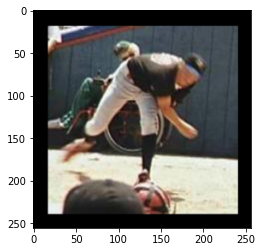

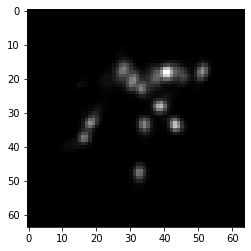

 18%|█▊        | 45/250 [00:04<00:25,  8.20it/s]

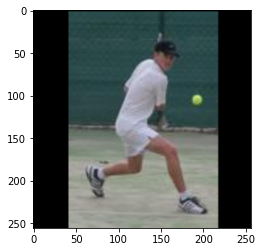

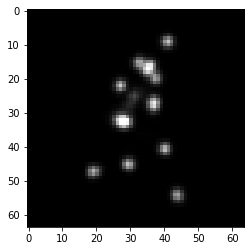

 34%|███▍      | 85/250 [00:07<00:10, 15.79it/s]

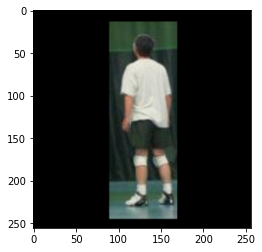

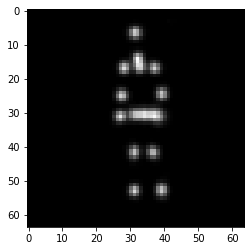

100%|██████████| 250/250 [00:18<00:00, 13.74it/s]
[2020-08-03 16:12:39,900][INFO] >> Training complete in 0:00:19

loss_stack =  {'stack1': tensor(0.0002), 'stack2': tensor(0.0002)}
avgloss =  tensor(0.0002)

{'acc[0]': tensor(0.9064), 'acc[1]': tensor(0.8860), 'acc[2]': tensor(0.9048), 'acc[3]': tensor(0.8978), 'acc[4]': tensor(0.9030), 'acc[5]': tensor(0.9051), 'acc[6]': tensor(0.9026), 'acc[7]': tensor(0.9177), 'acc[8]': tensor(0.8837), 'acc[9]': tensor(0.9162), 'acc[10]': tensor(0.9386), 'acc[11]': tensor(0.9317), 'acc[12]': tensor(0.9109), 'acc[13]': tensor(0.8852)}


In [2]:
# test.py

#--- Test and Visualize ---#
import time, datetime

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from torchsummary import summary
from tqdm import tqdm

from utils.visutil import *
from utils.osutils import import_module, join_path
from utils.logger import logger
from utils.config import get_config

#--- Global Vars ---#
dirpath = join_path('pretrained_weights', 'stacked_hourglass', 'mpii')
#dirpath = join_path('pretrained_weights', 'simple_baseline', 'mpii')
filepath = join_path(dirpath, 'test.yaml')
cfg = get_config(filepath)

# pretrained model
ckpt_fname = 'hg_s2_b1.pth.tar'
#ckpt_fname = 'pose_resnet_101_256x256.pth.tar'
ckpt_path = join_path(dirpath, ckpt_fname) # checkpoint path

# text logger
txt_logger = logger(filename=None)

# cuda / cpu device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
txt_logger.warning('Available Device:{}'.format(device))


### Parts Index (MPII 기준으로 indexing이 바뀝니다. pelvis, thorax가 추가되어 번호가 밀렸을뿐 다른 차이는 없습니다.)###
"""
1~3:r(ank,knee,hip)
4~6:l(hip,knee,ank)
(lsp) 7:neck, 8:head, 9~11:r(wrist,elbow,shoulder), 12~14:l(shoulder,elbow,wrist)
(mpii) 7:pelvis, 8:thorax, 9:neck, 10:head, 11~13:r(wrist,elbow,shoulder), 14~16:l(shoulder,elbow,wrist)
"""
# p_idx is the index of joints used to compute accuracy
if cfg.DATASET.NAME in ['lsp']:
    p_idx = [1,2,3,4,5,6,10,11,12,13,14,15,16] # pelvis(7), thorax(8), neck(9)을 제외한 나머지 parts의 정확도를 구함.
else:
    print("Unknown dataset: {}".format(cfg.DATASET.NAME))
    assert False


def main():
    cudnn.benchmark = True
    cudnn.deterministic = False
    cudnn.enabled = True

    # load checkpoint
    checkpoint = torch.load(ckpt_path)
    #print(checkpoint.keys())

    ds_module = import_module('datasets.' + cfg.DATASET.NAME) # dataset path
    md_module = import_module('models.' + cfg.MODEL.NAME + '.model') # model path
    eval_module = import_module('evals.' + cfg.EVAL_METRIC) # evaluation metric path

    # get dataset
    test_dataset = ds_module.get_dataset(is_train=False, **cfg.DATASET)

    dataloader = { 'valid': DataLoader(test_dataset, batch_size=cfg.OPTS.BATCH_SIZE, 
                                        shuffle=False, num_workers=0, pin_memory=True) }

    # get model
    model = md_module.get_model(cfg)
    
    # stacked hg
    model = torch.nn.DataParallel(model).to(device)
    model.load_state_dict(checkpoint['state_dict'])
    
    # simple baseline
    #model.load_state_dict(checkpoint)
    #model = torch.nn.DataParallel(model).to(device)

    # model summary
    #summary(model.cuda(), input_size=(3, 256, 256), batch_size=-1)

    # loss
    from criterions.jointsmseloss import JointsMSELoss
    criterion = JointsMSELoss(use_target_weight=True).to(device)

    # Print current experiment setting
    txt_logger.warning('### Current Experiment Configs ###')
    txt_logger.warning(cfg)
    txt_logger.warning('##################################')
    t_s = time.time()

    # Test
    txt_logger.info('Testing...')
    test(model, dataloader['valid'], criterion, eval_module)

    # elapsed time
    t_e = time.time() - t_s
    times = str(datetime.timedelta(seconds=t_e)).split(".")[0]
    txt_logger.info('Training complete in {}'.format(times))


def test(model, dataloader, criterion, eval_module):
    
    model.eval()

    with torch.no_grad():
        cnt = 0
        vis_losses = []
        NUM_DATA = len(dataloader.dataset)
        TEST_VIS_STEP = torch.floor(torch.rand(3) * 100) # random samples

        idx = 0
        all_preds = torch.zeros((NUM_DATA, 16, 2))
        all_gts = torch.zeros((NUM_DATA, 16, 2))

        for i, (cropimg, inp, target, meta) in enumerate(tqdm(dataloader)):
            # send data to device
            inp, target = inp.to(device), target.to(device)

            # predicts
            outputs = model(inp)
            
            if i in TEST_VIS_STEP:
                show_img(cropimg[0])
                if type(outputs) == list:
                    show_heatmaps_all(outputs[-1][0].cpu())
                else:
                    show_heatmaps_all(outputs[0].cpu())
            
            # compute loss
            if type(outputs) == list: # multi-stage
                for s in range(len(outputs)):
                    loss = criterion(outputs[s], target, meta['target_weight'].to(device)) # compute all losses at the end of stack
                    
                    if len(vis_losses) != len(outputs):
                        vis_losses = [0] * len(outputs) # init
                    else:
                        vis_losses[s] += loss.item()

                score_map = outputs[-1]
            else: # single-stage
                loss = criterion(outputs, target, meta['target_weight'].to(device))

                if len(vis_losses) == 0:
                    vis_losses = [0] # init
                else:
                    vis_losses[0] += loss.item()

                score_map = outputs

            num_images = inp.size(0)
            preds = eval_module.get_preds(score_map) # heatmap으로부터 최대 값을 갖는 픽셀의 좌표를 얻습니다.
            gts = eval_module.get_preds(target) # BxPx2

            all_preds[idx:idx+num_images, :, 0:2] = preds[:, :, 0:2]
            all_gts[idx:idx+num_images, :, 0:2] = gts[:, :, 0:2]
            idx += num_images

            cnt += 1

        # compute accuracy using pck metric
        acc = eval_module.accuracy(all_preds, all_gts, p_idx, thr=0.5)

        # print all losses of stacks
        vis_losses = torch.tensor(vis_losses)
        vis_losses = vis_losses / cnt
        # stack이 하나인 single-stage인 경우 loss는 한번만 출력됩니다.
        loss_stack = {'stack' + str(stk+1): vis_losses[stk] for stk in range(vis_losses.size(0))} 
        print()
        print('loss_stack = ', loss_stack)
        avgloss = vis_losses.sum() / vis_losses.size(0)
        print('avgloss = ', avgloss)
        loss_stack.clear()

        # print accuracy
        acc_dict = {'acc[{}]'.format(idx): val for idx, val in enumerate(acc)}
        print()
        print(acc_dict)

        avgacc = acc[0]
        return avgloss, avgacc


if __name__ == '__main__':
    main()

```
'acc[0]': tensor(0.9064) # 평균
'acc[1]': tensor(0.8860) # left ank
'acc[2]': tensor(0.9048) # left knee
'acc[3]': tensor(0.8978) # left hip
'acc[4]': tensor(0.9030) # right hip
'acc[5]': tensor(0.9051) # right knee
'acc[6]': tensor(0.9026) # right ank
'acc[7]': tensor(0.9177) # head
'acc[8]': tensor(0.8837) # left wrist
'acc[9]': tensor(0.9162) # left elbow
'acc[10]': tensor(0.9386)# left shoulder
'acc[11]': tensor(0.9317)# right shoulder
'acc[12]': tensor(0.9109)# right elbow
'acc[13]': tensor(0.8852)# right wrist
```

#### Simple Baseline

`pretrained_weights/simple_baseline/mpii/test.yaml` config file: 
```
MODEL:
  NAME: 'simple_baseline'
  NUM_JOINTS: 16
  EXTRA:
    FINAL_CONV_KERNEL: 1
    DECONV_WITH_BIAS: false
    NUM_DECONV_LAYERS: 3
    NUM_DECONV_FILTERS:
    - 256
    - 256
    - 256
    NUM_DECONV_KERNELS:
    - 4
    - 4
    - 4
    NUM_LAYERS: 101
  STYLE: 'pytorch'
  
DATASET:
  NAME: 'lsp'
  INP_RES: 256
  OUT_RES: 64
  SIGMA: 1
  use_std: True

EVAL_METRIC: 'pck'  # evaluation metric

OPTS:  # main options
  BATCH_SIZE: 4
```

[2020-08-03 16:12:39,991][WARNING] >> Logs will be recorded at stream only.
[2020-08-03 16:12:39,991][WARNING] >> Logs will be recorded at stream only.
[2020-08-03 16:12:39,992][WARNING] >> Available Device:cuda:0
[2020-08-03 16:12:39,992][WARNING] >> Available Device:cuda:0
    Mean: 0.4442, 0.4302, 0.4039
    Std:  0.2376, 0.2296, 0.2356
[2020-08-03 16:12:40,839][WARNING] >> ### Current Experiment Configs ###
[2020-08-03 16:12:40,839][WARNING] >> ### Current Experiment Configs ###
[2020-08-03 16:12:40,840][WARNING] >> {'MODEL': {'NAME': 'simple_baseline', 'NUM_JOINTS': 16, 'EXTRA': {'FINAL_CONV_KERNEL': 1, 'DECONV_WITH_BIAS': False, 'NUM_DECONV_LAYERS': 3, 'NUM_DECONV_FILTERS': [256, 256, 256], 'NUM_DECONV_KERNELS': [4, 4, 4], 'NUM_LAYERS': 101}, 'STYLE': 'pytorch'}, 'DATASET': {'NAME': 'lsp', 'INP_RES': 256, 'OUT_RES': 64, 'SIGMA': 1, 'use_std': True}, 'EVAL_METRIC': 'pck', 'OPTS': {'BATCH_SIZE': 4}}
[2020-08-03 16:12:40,840][WARNING] >> {'MODEL': {'NAME': 'simple_baseline', 'NUM_JO

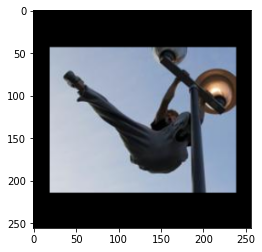

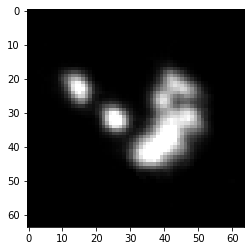

  6%|▌         | 15/250 [00:01<00:27,  8.55it/s]

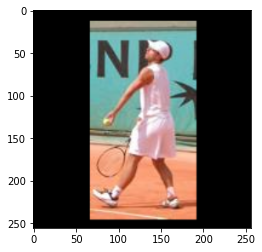

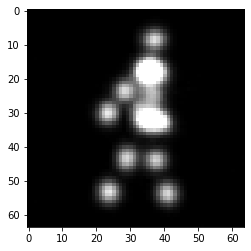

  8%|▊         | 21/250 [00:02<00:23,  9.68it/s]

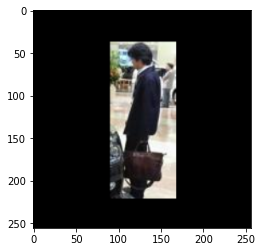

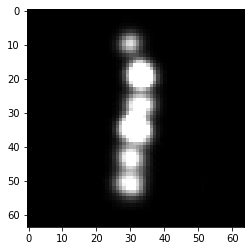

100%|██████████| 250/250 [00:17<00:00, 14.61it/s]
[2020-08-03 16:12:58,757][INFO] >> Training complete in 0:00:17
[2020-08-03 16:12:58,757][INFO] >> Training complete in 0:00:17

loss_stack =  {'stack1': tensor(0.0008)}
avgloss =  tensor(0.0008)

{'acc[0]': tensor(0.8341), 'acc[1]': tensor(0.8549), 'acc[2]': tensor(0.8696), 'acc[3]': tensor(0.8609), 'acc[4]': tensor(0.8772), 'acc[5]': tensor(0.8759), 'acc[6]': tensor(0.8653), 'acc[7]': tensor(0.8715), 'acc[8]': tensor(0.7218), 'acc[9]': tensor(0.7984), 'acc[10]': tensor(0.8578), 'acc[11]': tensor(0.8740), 'acc[12]': tensor(0.8000), 'acc[13]': tensor(0.7158)}


In [3]:
# test.py

#--- Test and Visualize ---#
import time, datetime

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from torchsummary import summary
from tqdm import tqdm

from utils.visutil import *
from utils.osutils import import_module, join_path
from utils.logger import logger
from utils.config import get_config

#--- Global Vars ---#
#dirpath = join_path('pretrained_weights', 'stacked_hourglass', 'mpii')
dirpath = join_path('pretrained_weights', 'simple_baseline', 'mpii')
filepath = join_path(dirpath, 'test.yaml')
cfg = get_config(filepath)

# pretrained model
#ckpt_fname = 'hg_s2_b1.pth.tar'
ckpt_fname = 'pose_resnet_101_256x256.pth.tar'
ckpt_path = join_path(dirpath, ckpt_fname) # checkpoint path

# text logger
txt_logger = logger(filename=None)

# cuda / cpu device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
txt_logger.warning('Available Device:{}'.format(device))


### Parts Index (MPII 기준으로 indexing이 바뀝니다. pelvis, thorax가 추가되어 번호가 밀렸을뿐 다른 차이는 없습니다.)###
"""
1~3:r(ank,knee,hip)
4~6:l(hip,knee,ank)
(lsp) 7:neck, 8:head, 9~11:r(wrist,elbow,shoulder), 12~14:l(shoulder,elbow,wrist)
(mpii) 7:pelvis, 8:thorax, 9:neck, 10:head, 11~13:r(wrist,elbow,shoulder), 14~16:l(shoulder,elbow,wrist)
"""
# p_idx is the index of joints used to compute accuracy
if cfg.DATASET.NAME in ['lsp']:
    p_idx = [1,2,3,4,5,6,10,11,12,13,14,15,16] # pelvis(7), thorax(8), neck(9)을 제외한 나머지 parts의 정확도를 구함.
else:
    print("Unknown dataset: {}".format(cfg.DATASET.NAME))
    assert False


def main():
    cudnn.benchmark = True
    cudnn.deterministic = False
    cudnn.enabled = True

    # load checkpoint
    checkpoint = torch.load(ckpt_path)
    #print(checkpoint.keys())

    ds_module = import_module('datasets.' + cfg.DATASET.NAME) # dataset path
    md_module = import_module('models.' + cfg.MODEL.NAME + '.model') # model path
    eval_module = import_module('evals.' + cfg.EVAL_METRIC) # evaluation metric path

    # get dataset
    test_dataset = ds_module.get_dataset(is_train=False, **cfg.DATASET)

    dataloader = { 'valid': DataLoader(test_dataset, batch_size=cfg.OPTS.BATCH_SIZE, 
                                        shuffle=False, num_workers=0, pin_memory=True) }

    # get model
    model = md_module.get_model(cfg)
    
    # stacked hg
    #model = torch.nn.DataParallel(model).to(device)
    #model.load_state_dict(checkpoint['state_dict'])
    
    # simple baseline
    model.load_state_dict(checkpoint)
    model = torch.nn.DataParallel(model).to(device)

    # model summary
    #summary(model.cuda(), input_size=(3, 256, 256), batch_size=-1)

    # loss
    from criterions.jointsmseloss import JointsMSELoss
    criterion = JointsMSELoss(use_target_weight=True).to(device)

    # Print current experiment setting
    txt_logger.warning('### Current Experiment Configs ###')
    txt_logger.warning(cfg)
    txt_logger.warning('##################################')
    t_s = time.time()

    # Test
    txt_logger.info('Testing...')
    test(model, dataloader['valid'], criterion, eval_module)

    # elapsed time
    t_e = time.time() - t_s
    times = str(datetime.timedelta(seconds=t_e)).split(".")[0]
    txt_logger.info('Training complete in {}'.format(times))


def test(model, dataloader, criterion, eval_module):
    
    model.eval()

    with torch.no_grad():
        cnt = 0
        vis_losses = []
        NUM_DATA = len(dataloader.dataset)
        TEST_VIS_STEP = torch.floor(torch.rand(3) * 100) # random samples

        idx = 0
        all_preds = torch.zeros((NUM_DATA, 16, 2))
        all_gts = torch.zeros((NUM_DATA, 16, 2))

        for i, (cropimg, inp, target, meta) in enumerate(tqdm(dataloader)):
            # send data to device
            inp, target = inp.to(device), target.to(device)

            # predicts
            outputs = model(inp)
            
            if i in TEST_VIS_STEP:
                show_img(cropimg[0])
                if type(outputs) == list:
                    show_heatmaps_all(outputs[-1][0].cpu())
                else:
                    show_heatmaps_all(outputs[0].cpu())
            
            # compute loss
            if type(outputs) == list: # multi-stage
                for s in range(len(outputs)):
                    loss = criterion(outputs[s], target, meta['target_weight'].to(device)) # compute all losses at the end of stack
                    
                    if len(vis_losses) != len(outputs):
                        vis_losses = [0] * len(outputs) # init
                    else:
                        vis_losses[s] += loss.item()

                score_map = outputs[-1]
            else: # single-stage
                loss = criterion(outputs, target, meta['target_weight'].to(device))

                if len(vis_losses) == 0:
                    vis_losses = [0] # init
                else:
                    vis_losses[0] += loss.item()

                score_map = outputs

            num_images = inp.size(0)
            preds = eval_module.get_preds(score_map) # heatmap으로부터 최대 값을 갖는 픽셀의 좌표를 얻습니다.
            gts = eval_module.get_preds(target) # BxPx2

            all_preds[idx:idx+num_images, :, 0:2] = preds[:, :, 0:2]
            all_gts[idx:idx+num_images, :, 0:2] = gts[:, :, 0:2]
            idx += num_images

            cnt += 1

        # compute accuracy using pck metric
        acc = eval_module.accuracy(all_preds, all_gts, p_idx, thr=0.5)

        # print all losses of stacks
        vis_losses = torch.tensor(vis_losses)
        vis_losses = vis_losses / cnt
        # stack이 하나인 single-stage인 경우 loss는 한번만 출력됩니다.
        loss_stack = {'stack' + str(stk+1): vis_losses[stk] for stk in range(vis_losses.size(0))} 
        print()
        print('loss_stack = ', loss_stack)
        avgloss = vis_losses.sum() / vis_losses.size(0)
        print('avgloss = ', avgloss)
        loss_stack.clear()

        # print accuracy
        acc_dict = {'acc[{}]'.format(idx): val for idx, val in enumerate(acc)}
        print()
        print(acc_dict)

        avgacc = acc[0]
        return avgloss, avgacc


if __name__ == '__main__':
    main()

```
# 성능이 실제론 이것보단 훨씬 좋아야하지만 transform 과정이 원본 코드와 구현이 달라서 성능 저하가 일어난 것으로 보입니다.

'acc[0]': tensor(0.8341)
'acc[1]': tensor(0.8549)
'acc[2]': tensor(0.8696)
'acc[3]': tensor(0.8609)
'acc[4]': tensor(0.8772)
'acc[5]': tensor(0.8759)
'acc[6]': tensor(0.8653)
'acc[7]': tensor(0.8715)
'acc[8]': tensor(0.7218)
'acc[9]': tensor(0.7984)
'acc[10]': tensor(0.8578)
'acc[11]': tensor(0.8740)
'acc[12]': tensor(0.8000)
'acc[13]': tensor(0.7158)
```